In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('Pokemon.csv')

In [3]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
data_raw = data.copy()

In [5]:
data_raw

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
data_raw.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
data_raw = data_raw.drop(['#', 'Name', 'Type 2'], axis=1)

In [9]:
data_raw

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,False
1,Grass,405,60,62,63,80,80,60,1,False
2,Grass,525,80,82,83,100,100,80,1,False
3,Grass,625,80,100,123,122,120,80,1,False
4,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,True
796,Rock,700,50,160,110,160,110,110,6,True
797,Psychic,600,80,110,60,150,130,70,6,True
798,Psychic,680,80,160,60,170,130,80,6,True


In [10]:
data_raw['Legendary'] = data_raw['Legendary'].astype(np.int_)

In [11]:
data_raw

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,1,0
1,Grass,405,60,62,63,80,80,60,1,0
2,Grass,525,80,82,83,100,100,80,1,0
3,Grass,625,80,100,123,122,120,80,1,0
4,Fire,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,Rock,600,50,100,150,100,150,50,6,1
796,Rock,700,50,160,110,160,110,110,6,1
797,Psychic,600,80,110,60,150,130,70,6,1
798,Psychic,680,80,160,60,170,130,80,6,1


In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Total       800 non-null    int64 
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 62.6+ KB


In [13]:
data_raw['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [14]:
numeric_columns = data_raw.drop('Type 1', axis=1).columns
numeric_columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary'],
      dtype='object')

In [15]:
correlation_matrix = data[numeric_columns].corr()
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


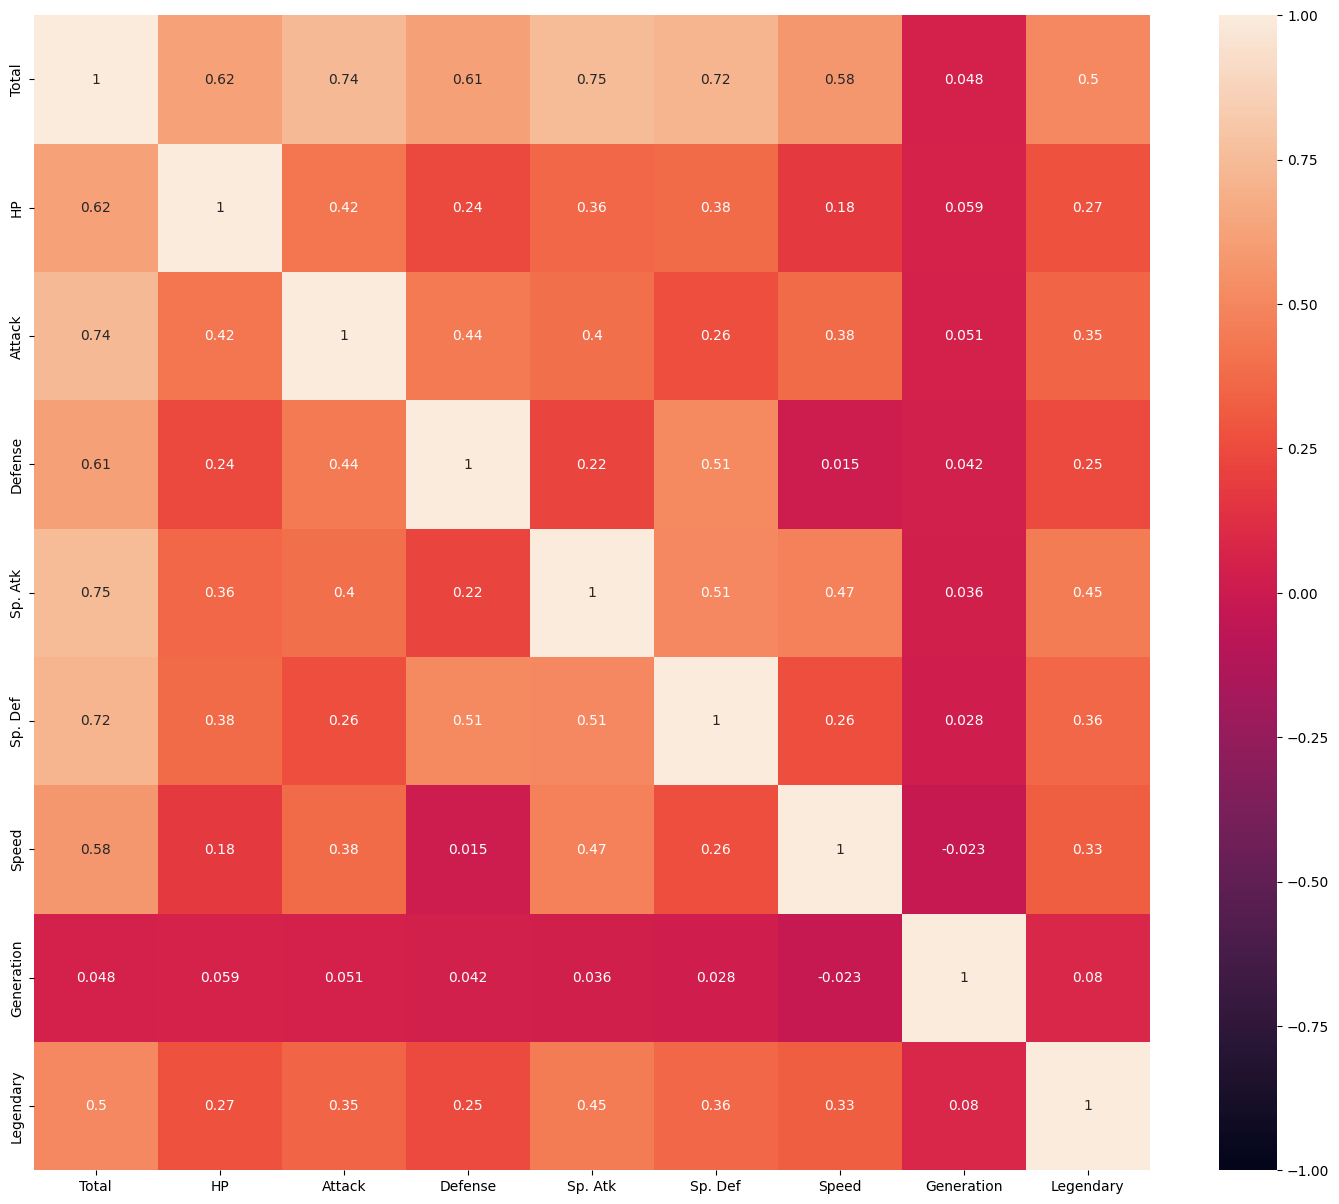

In [16]:
# generating a plot with heatmap between columns
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

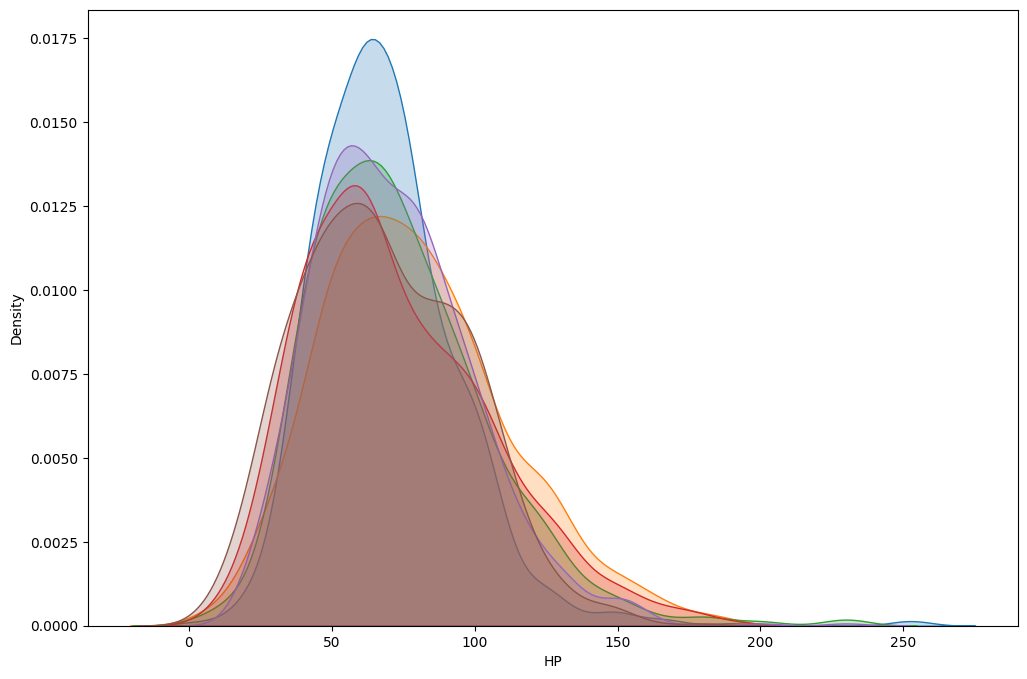

In [17]:
plt.figure(figsize=(12, 8))
for column in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    sns.kdeplot(data_raw[column], fill=True)

plt.show()

In [18]:
# Making preprocessing
data_raw.dtypes

Type 1        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary      int64
dtype: object

In [19]:
# encoding

def encoding(df, column, prefix):
    df = df.copy()
    # function get_dummies
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

data_raw_encod = encoding(data_raw, 'Type 1', 't')
data_raw_encod

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,1,0,...,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,1,0,...,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,1,0,...,0,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,1,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
data_raw_encod.dtypes


Total         int64
HP            int64
Attack        int64
Defense       int64
Sp. Atk       int64
Sp. Def       int64
Speed         int64
Generation    int64
Legendary     int64
t_Bug         uint8
t_Dark        uint8
t_Dragon      uint8
t_Electric    uint8
t_Fairy       uint8
t_Fighting    uint8
t_Fire        uint8
t_Flying      uint8
t_Ghost       uint8
t_Grass       uint8
t_Ground      uint8
t_Ice         uint8
t_Normal      uint8
t_Poison      uint8
t_Psychic     uint8
t_Rock        uint8
t_Steel       uint8
t_Water       uint8
dtype: object

In [21]:
data_raw_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    int64
 9   t_Bug       800 non-null    uint8
 10  t_Dark      800 non-null    uint8
 11  t_Dragon    800 non-null    uint8
 12  t_Electric  800 non-null    uint8
 13  t_Fairy     800 non-null    uint8
 14  t_Fighting  800 non-null    uint8
 15  t_Fire      800 non-null    uint8
 16  t_Flying    800 non-null    uint8
 17  t_Ghost     800 non-null    uint8
 18  t_Grass     800 non-null    uint8
 19  t_Ground    800 non-null    uint8
 20  t_Ice       800 non-null    uint

In [22]:
# splitting the data

y = data_raw_encod['Legendary']
x = data_raw_encod.drop('Legendary', axis=1)
y


0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64

In [23]:
x

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,t_Bug,t_Dark,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6,0,0,...,0,0,0,0,0,0,0,1,0,0
796,700,50,160,110,160,110,110,6,0,0,...,0,0,0,0,0,0,0,1,0,0
797,600,80,110,60,150,130,70,6,0,0,...,0,0,0,0,0,0,1,0,0,0
798,680,80,160,60,170,130,80,6,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# scaling 

scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

[[-0.97676549 -0.95062622 -0.92490618 ... -0.24124895 -0.18689261
  -0.40347329]
 [-0.25108843 -0.3628221  -0.5241302  ... -0.24124895 -0.18689261
  -0.40347329]
 [ 0.74984544  0.42091674  0.09244823 ... -0.24124895 -0.18689261
  -0.40347329]
 ...
 [ 1.37542912  0.42091674  0.95565803 ... -0.24124895 -0.18689261
  -0.40347329]
 [ 2.04271837  0.42091674  2.49710411 ... -0.24124895 -0.18689261
  -0.40347329]
 [ 1.37542912  0.42091674  0.95565803 ... -0.24124895 -0.18689261
  -0.40347329]]


In [25]:
print(X_train, len(X_train))

[[ 0.41620082  1.20465557  0.3390796  ... -0.24124895 -0.18689261
   2.4784788 ]
 [ 0.74984544 -0.16688739 -0.58578805 ... -0.24124895 -0.18689261
  -0.40347329]
 [ 0.10757954 -0.40200904  0.95565803 ... -0.24124895  5.35066628
  -0.40347329]
 ...
 [ 2.04271837  1.43977722  1.57223646 ... -0.24124895 -0.18689261
  -0.40347329]
 [-1.05183553 -0.98981316 -0.64744589 ... -0.24124895 -0.18689261
  -0.40347329]
 [ 1.37542912 -0.3628221  -0.43164344 ... -0.24124895 -0.18689261
  -0.40347329]] 560


In [26]:
print(X_test, len(X_test))

[[ 1.37542912  0.89116004  0.80151342 ... -0.24124895 -0.18689261
  -0.40347329]
 [ 0.41620082  0.22498203 -0.12335422 ... -0.24124895 -0.18689261
  -0.40347329]
 [-0.70984979 -0.5587568  -0.27749883 ... -0.24124895 -0.18689261
  -0.40347329]
 ...
 [ 0.49961197  0.22498203  1.41809186 ...  4.14509568 -0.18689261
  -0.40347329]
 [ 0.54131755  0.02904732  0.95565803 ... -0.24124895 -0.18689261
  -0.40347329]
 [-1.12690558 -1.14656093 -1.20236648 ... -0.24124895 -0.18689261
  -0.40347329]] 240


In [27]:
y_train

404    0
522    0
749    0
426    1
41     0
      ..
71     0
106    0
270    1
435    0
102    0
Name: Legendary, Length: 560, dtype: int64

In [28]:
y_test

696    0
667    0
63     0
533    0
66     0
      ..
220    0
450    0
380    0
132    0
375    0
Name: Legendary, Length: 240, dtype: int64

In [29]:
# Training with tensorFlow
# checking the shape of X
X.shape

(800, 26)

In [41]:
# Creating input

inputs = tf.keras.Input(shape=(26,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [42]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [43]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [44]:
batch_size = 32
epochs = 20
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
14/14 [==============================] - 1s 13ms/step - loss: 0.5210 - accuracy: 0.8036 - auc: 0.3784 - val_loss: 0.3949 - val_accuracy: 0.9018 - val_auc: 0.3380 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.3149 - accuracy: 0.9129 - auc: 0.5450 - val_loss: 0.3275 - val_accuracy: 0.9018 - val_auc: 0.6157 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.2378 - accuracy: 0.9129 - auc: 0.8494 - val_loss: 0.2707 - val_accuracy: 0.9018 - val_auc: 0.8092 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9286 - auc: 0.9341 - val_loss: 0.2328 - val_accuracy: 0.8929 - val_auc: 0.8915 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.1675 - accuracy: 0.9353 - auc: 0.9582 - val_loss: 0.2105 - val_accuracy: 0.8929 - val_auc: 0.9176 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.

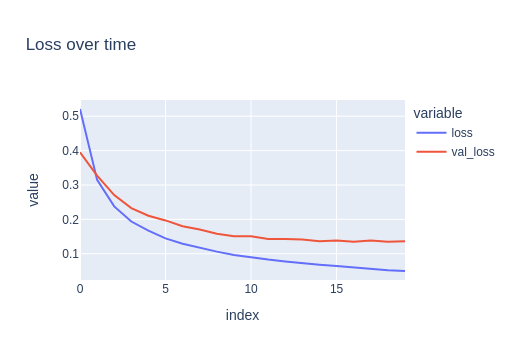

In [45]:
px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'x': 'Epoch', 'y': 'Loss'},
    title='Loss over time'
)

In [47]:
np.argmin(history.history['val_loss'])

16

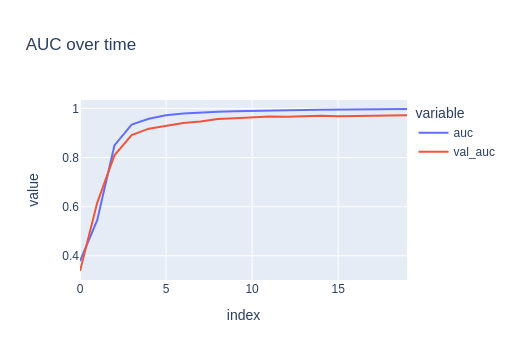

In [46]:
fig_auc = px.line(
    history.history,
    y=['auc', 'val_auc'],
    labels={'x': 'Epoch', 'y': 'AUC'},
    title="AUC over time"
)
fig_auc.show()

In [48]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.1120 - accuracy: 0.9542 - auc: 0.9704


[0.1119748055934906, 0.9541666507720947, 0.9703704118728638]

In [49]:
# Post training analysis

(model.predict(X_test) > 0.5).sum()

8/8 [==============================] - 0s 834us/step


20

In [50]:
len(y_test)

240

In [55]:
# generating the prediction
predictions_bool = np.hstack((model.predict(X_test) > 0.5).astype(np.int64)) != y_test
print(predictions_bool)
predictions = (predictions_bool).astype(np.int64) 

8/8 [==============================] - 0s 986us/step
696     True
667    False
63     False
533    False
66     False
       ...  
220    False
450    False
380    False
132    False
375    False
Name: Legendary, Length: 240, dtype: bool


In [53]:
predictions

696    1
667    0
63     0
533    0
66     0
      ..
220    0
450    0
380    0
132    0
375    0
Name: Legendary, Length: 240, dtype: int64